In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('meto transfer.csv')
df.head(3)

,Txhash,Blockno,UnixTimestamp,DateTime,From,To,Quantity,Method
0,0xb4878de6314ab75e17b1243a651044578b076ed2b9bc...,19154416,1656633696,2022-07-01 00:01:36,0xb587db81b2c9f5759b287f94b79d36bceebf0c20,0x290403be913aeace7980817e95d58278714f09c4,"701,250",Claim
1,0x6d0e03922848fcf5dbddaff1dc35f3bacf8137f83a24...,19154589,1656634215,2022-07-01 00:10:15,0x290403be913aeace7980817e95d58278714f09c4,0xd152f549545093347a162dce210e7293f1452150,"700,651",Disperse Token
2,0x6d0e03922848fcf5dbddaff1dc35f3bacf8137f83a24...,19154589,1656634215,2022-07-01 00:10:15,0xd152f549545093347a162dce210e7293f1452150,0x017f9a78bfffd814fe555cca4428f2d66d4cc090,"3,640",Disperse Token


In [201]:
def pie_chart(df, address):
    claim = len(df.loc[(df['From'] == address) & ((df['Method'].str.contains('Claim')) | (df['Method'].str.contains('Withdraw')))]['To'].values.tolist())
    swap = len(df.loc[(df['From'] == address) & (df['Method'].str.contains('Swap'))]['To'].values.tolist())
    stake = len(df.loc[(df['From'] == address) & (df['Method'].str.contains('Stake'))]['To'].values.tolist())
    transfer = len(df.loc[(df['From'] == address) & (df['Method'].str.startswith('Transfer'))]['To'].values.tolist())
    disperse = len(df.loc[((df['From'] == address) & (df['Method'] == 'Disperse Token'))]['To'].values.tolist())
    all_methods = claim + swap + stake + transfer + disperse
    others = len(df.loc[df['From'] == address]) - all_methods
    
    
    methods = ['Claim', 'Swap', 'Stake', 'Transfer', 'Disperse', 'Others']
    
    data = [claim, swap, stake, transfer, disperse, others]
    
    explode = (0.1, 0.2, 0.2, 0.3, 0.2, 0.2)
    
    colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige")
    
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }
    
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)
    
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = methods,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
    # Adding legend
    ax.legend(wedges, methods,
              title ="Methods",
              loc ="center left",
              bbox_to_anchor =(1.1, 0, 0.5, 1.5))
 
    plt.setp(autotexts, size = 8, weight ="bold")
    
    plt.savefig('Pie chart',loc = 'right center' ,dpi=60, facecolor='w', orientation='portrait', 
                papertype='ledger', transparent=False, pad_inches=0.5, frameon=True)
    # show plot
    plt.show()

## --------------------------------------------------------------------------------------------------------------------------------------

In [85]:
df.From.sample(3)

2007    0xc590175e458b83680867afd273527ff58f74c02b
2764    0xaf831916463a1c38493bb7c77a2cb16494f13566
768     0x989053592163d77bde8ec063fc1c1b8d60c6c793
Name: From, dtype: object

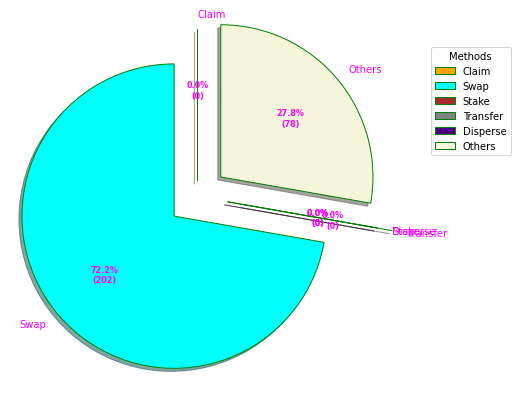

In [218]:
pie_chart(df, df.From.sample(1).values[0])